A2 de Linguagens de Programação – 26/11/2018
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a): Lucas Machado Moschen

In [2]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

Entre com o seu nome completo: Lucas Machado Moschen
Olá, Lucas Machado Moschen!
Bom trabalho!


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import random
import re
import string
import time
import pymysql
import sqlite3
import getpass
import pandas.io.sql as psql
import networkx as nx
from IPython.display import clear_output
%matplotlib inline

In [122]:
def execute(action): #função básica que retorna o print para as questões que podem ser nesse sentido
    cur.execute(action)
    for r in cur.fetchall():
        print(r)

Questão 1 (1,0 ponto):  

Utilizando Python + SQL, crie uma tabela "aluno" em banco de dados no sqlite que tenha os seguintes campos:

+ id 
+ nome
+ data_nascimento
+ matricula

Escolha os tipos de dados apropriados. O campo id é chave primária, e deve ser autoincrementável. 

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [57]:
conn = sqlite3.connect('../../Dados/meudatabase.sqlite')
cur = conn.cursor()

In [58]:
action = '''CREATE TABLE IF NOT EXISTS aluno
(id INTEGER PRIMARY KEY AUTOINCREMENT,
nome VARCHAR(255),
data_nascimento VARCHAR(10), 
matricula VARCHAR(255))'''

#data não tem tipo específico no sqlite.

conf = 'pragma table_info(aluno)'

exemplo = '''insert into aluno 
values (1,"Lucas Moschen", "28/04/2000","000-000-01")'''

conf2 = 'select * from aluno '

In [59]:
execute(action) #nome deve ser um varchar. Data_nascimento um varchar. Matricula, um varchar, já que não é bem definido.

In [60]:
execute(conf)

(0, 'id', 'INTEGER', 0, None, 1)
(1, 'nome', 'VARCHAR(255)', 0, None, 0)
(2, 'data_nascimento', 'VARCHAR(10)', 0, None, 0)
(3, 'matricula', 'VARCHAR(255)', 0, None, 0)


In [61]:
execute(exemplo)

In [62]:
execute(conf2)

(1, 'Lucas Moschen', '28/04/2000', '000-000-01')


Questão 2 (1.5 ponto):  

Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos Python + SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [63]:
conn = sqlite3.connect('../../Dados/iris_database.sqlite')
cur = conn.cursor()

In [64]:
#a) 
spec_dif = '''select count(*) from (select Species from iris group by Species)'''
execute(spec_dif)

(3,)


In [65]:
#b)
reg_totais = 'select count(*) from iris'
execute(reg_totais)

(150,)


In [66]:
#c)
petala = '''SELECT Species, avg(PetalLengthCm*PetalWidthCm)
FROM iris 
GROUP BY Species 
ORDER BY avg(PetalLengthCm*PetalWidthCm) DESC 
LIMIT 1
'''

execute(petala)

('Iris-virginica', 11.296199999999994)


In [69]:
#d)
area_total = '''SELECT Species, avg(PetalLengthCm*PetalWidthCm + SepalLengthCm*SepalWidthCm)
FROM iris 
GROUP BY Species 
ORDER BY avg(PetalLengthCm*PetalWidthCm) DESC 
LIMIT 1
'''

execute(area_total)

('Iris-virginica', 30.9808)


Questão 3 (1.5 pontos):  

Importe o arquivo ../../Dados/votesurvey.xls para um dataframe do Python usando o método apropriado, e responda às questões:  

a) Exiba as 15 primeiras linhas (essa é muito fácil!).  
b) Qual a média de salário desejado, dentre os eleitores de cada presidente?  
c) Qual fator tem maior influência sobre o salário atual? Sexo ou Idade?  
d) Crie uma nova coluna no dataframe original que exiba o salário atual dividido pela idade.  

In [70]:
votes = pd.read_excel('../../Dados/votesurvey.xls') #importo para um DataFrame

In [71]:
#a)
votes[0:15]

,Gender,Age,Salary before Stern,Expected salary,Candidate
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush
9,Male,26,120000,80000,Bush


In [73]:
#b)
Candidatos = set(votes.Candidate)
for c in Candidatos:
    eleitores = votes[votes.Candidate == c]
    media = np.mean(eleitores.iloc[:,3])
    if c == 'Bush' or c == 'Gore': #restrinjo para aparecer somente os presidentes.
        print('A média desejada por eleitores de {} é {}'.format(c, str(media)))

A média desejada por eleitores de Gore é 103055.55555555556
A média desejada por eleitores de Bush é 111666.66666666667


In [76]:
#c) #inicialmente criarei as médias de ambas as informações. Depois calacularei os mínimos quadrados. 
# o  menos resultado é o que "mais infleuencia"

#Primeiro para idade, calculo a média
Idade = set(votes.Age)
dicio_idades = {}
for i in Idade:
    nessa_idade = votes[votes.Age == i]
    media = np.mean(nessa_idade.iloc[:,2])
    dicio_idades[i] = media
    

#depois os mínimos quadrados
minimos_idade = 0
for a in range(len(votes.Age)):
    q = (dicio_idades[votes.iloc[a,1]]  - votes.iloc[a,2])**2
    minimos_idade += q
    
#agora a média para os gênero
Genero = set(votes.Gender)
dicio_gender = {}
for g in Genero:
    esse_genero = votes[votes.Gender == g]
    media = np.mean(esse_genero.iloc[:,2])
    dicio_gender[g] = media

#depois os mínimos quadrados
minimos_gender = 0
for a in range(len(votes.Gender)):
    q = (dicio_gender[votes.iloc[a,0]]  - votes.iloc[a,2])**2 #mínimos quadrados de modo discreto
    minimos_gender += q
    
if minimos_gender < minimos_idade:
    print('O gênero é mais influente')
elif minimos_gender == minimos_idade:
    print('Ambos são igualmente influentes')
else:
    print('A idade é mais influente')
print('Mínimos quadrados da idade: {}, Mínimos quadrados do gênero: {}'.format(minimos_idade,minimos_gender))

A idade é mais influente
Mínimos quadrados da idade: 53682604365.079384, Mínimos quadrados do gênero: 65986558823.5294


In [77]:
#d)
votes['Salary per age'] = pd.Series(votes.iloc[:,2]/votes.iloc[:,1])
votes[0:15]

,Gender,Age,Salary before Stern,Expected salary,Candidate,Salary per age
0,Male,27,60000,110000,Bush,2222.222222
1,Male,30,125000,125000,Bush,4166.666667
2,Male,27,50000,120000,Bush,1851.851852
3,Male,26,56000,100000,Bush,2153.846154
4,Male,27,82000,100000,Bush,3037.037037
5,Male,32,150000,150000,Bush,4687.500000
6,Female,24,55000,100000,Bush,2291.666667
7,Male,30,110000,150000,Bush,3666.666667
8,Male,26,48000,80000,Bush,1846.153846
9,Male,26,120000,80000,Bush,4615.384615


Questão 4 (1.5 pontos): 

Transforme o arquivo ../../Dados/DomCasmurroMachadoAssis.txt em uma string no Python e responda, usando, quando possível, expressões regulares:  

a) Quais as 10 palavras mais frequentes que _começam_ com "a" ou "A"?  
b) Quantas palavras distintas que começam com letras _maiúsculas_ há no texto?  
c) Quantas palavras há no texto com apenas uma; com apenas duas; e com apenas 3 vogais?  

In [109]:
with open('../../Dados/DomCasmurroMachadoAssis.txt','r',encoding = 'utf-8') as f:
    texto = f.read()
texto_limpo = re.sub(r'[^a-zA-Z0-9ÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛÇáàãâêéèíìîóôõúùûç\-\']',' ',texto) #limpa o texto com caracteres desconhecidos
words = re.split(r'\s',texto_limpo)
words = [w.strip(string.punctuation) for w in words]

In [110]:
#a)
words_with_a = [w for w in words if re.search(r'^[aàáâãAàÁÂÃ]',w) and len(w)>0] #procurar em words, aquelas que inciam com a
dicio_a = {}
for w in words_with_a:
    if w in dicio_a:
        dicio_a[w] += 1
    else:
        dicio_a[w] = 1
mais_frequentes = sorted(dicio_a.items(), key=lambda x: x[1],reverse = True)
for i in range(10):
    print(mais_frequentes[i])

('a', 2318)
('as', 498)
('ao', 330)
('á', 262)
('A', 257)
('ainda', 130)
('assim', 120)
('agora', 118)
('até', 97)
('aos', 85)


In [112]:
#b)
maiusculas = {m for m in words if re.search(r'^[A-ZÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛÇ]',m)} #procura por maisuculas na lista words acima descrita
print('Existem aproximadamente, {} palavras com inicial maiúscula. '.format(len(maiusculas)))

Existem aproximadamente, 1600 palavras com inicial maiúscula. 


In [113]:
#c)
vogal1 = [p for p in words if re.search(r'^[^AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû]*[AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû]{1}[^AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû]*$',p)]
vogal2 = [p for p in words if re.search(r'^[^AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû]*[AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû][^AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû]*[AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû][^AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû]*$',p)]
vogal3 = [p for p in words if re.search(r'^[^AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû]*[AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû][^AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû]*[AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû][^AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû]*[AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû][^AEIOUaeiouÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛáàãâêéèíìîóôõúùû]*$',p)]

In [114]:
tam1 = len(vogal1)
tam2 = len(vogal2)
tam3 = len(vogal3)
print('Com uma vogal: {}, com duas vogais: {} e com três vogais: {}'.format(tam1,tam2,tam3))

Com uma vogal: 21858, com duas vogais: 24433 e com três vogais: 13230


Questão 5 (1.5 pontos):    

Utilizando apenas o Shell Linux, e utilizando o arquivo ../../Dados/DomCasmurroMachadoAssis.txt, diga os comandos para responder às seguintes perguntas:  

a) Quais as 10 palavras mais frequentes que _terminam_ com "a" ou "A"?  
b) Quantas palavras distintas que começam com _minúsculas_ há no texto?   
c) Como ordenar as palavras distintas por ordem de "rima"?  

In [91]:
#a)
!cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Za-zÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛÇáàãâêéèíìîóôõúùûç0-9\-]' '\n' | grep '^[aàáâãAàÁÂÃ]' | sort | uniq -c | sort -nr | head 

   2321 a
    500 as
    330 ao
    262 á
    242 A
    129 ainda
    120 assim
    118 agora
     97 até
     85 aos


In [94]:
#b)
!cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Za-zÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÛÇáàãâêéèíìîóôõúùç0-9\-]' '\n' | grep '^[A-ZÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÇ]' | sort | uniq | grep -c '^[A-ZÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÇ]'

1492


In [95]:
#c) Nesse exercicio não considerarei maiúsculas, pois elas não tem objetivo bem definido
!cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Za-zÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÇáàãâêéèíìîóôõúùç]' '\n' | tr '[A-ZÁÂÃÀÉÊÈÍÌÎÓÔÕÚÙÇ]' '[a-záâãàéêèíìîóôõúùç]'| sort | uniq | rev | sort | rev | sed -n '3,12p'

rev: stdin: Invalid or incomplete multibyte or wide character
a
á
acaba
barba
ameaça
bocca
bibliotheca
boneca
aconteça
astronomica
uniq: write error: Broken pipe


Questão 6 (2.0 ponto):  

Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Leia para dataframes do Pandas as tabelas "invoices", "invoice_items", "customers" e "tracks"; e mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Crie um histograma de faixas ("tracks") mais compradas.  
c) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [124]:
conn = sqlite3.connect('../../Dados/chinook.sqlite')
cur = conn.cursor()

In [118]:
#a) 
inicial = '''select c.CustomerId, c.FirstName,  t.Name
from customers as c 
join invoices as i
on c.CustomerId = i.InvoiceId
join invoice_items as it
on i.InvoiceId = it.InvoiceId
join tracks as t
on it.TrackId = t.TrackId
where c.FirstName like "M%"
'''
execute(inicial)

(14, 'Mark', 'Believe')
(14, 'Mark', 'As We Sleep')
(18, 'Michelle', 'Diga Lá, Coração')
(18, 'Michelle', 'Comportamento Geral')
(18, 'Michelle', 'Podres Poderes')
(18, 'Michelle', 'Queixa')
(18, 'Michelle', 'Ando Meio Desligado')
(18, 'Michelle', 'Vida De Cachorro')
(18, 'Michelle', 'Meu Refrigerador Não Funciona')
(18, 'Michelle', 'Smoke On The Water')
(18, 'Michelle', 'Trampled Under Foot')
(31, 'Martha', 'A Small Victory')
(31, 'Martha', 'Easy')
(31, 'Martha', 'The Gentle Art Of Making Enemies')
(31, 'Martha', 'Ugly In The Morning')
(31, 'Martha', 'What A Day')
(31, 'Martha', 'From Out Of Nowhere')
(35, 'Madalena', "Dust N' Bones")
(35, 'Madalena', 'Live and Let Die')
(41, 'Marc', 'Hallowed Be Thy Name')
(55, 'Mark', 'Master Of Puppets')
(58, 'Manoj', 'The Memory Remains')
(58, 'Manoj', 'The Unforgiven II')
(58, 'Manoj', 'Slither')
(58, 'Manoj', 'Bad Seed')


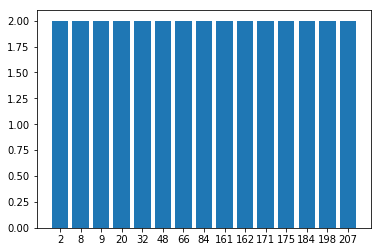

2240
(2240,)
1984


In [170]:
#b)
top_track = '''select it.TrackId, count(it.TrackId)*it.Quantity
from invoice_items as it
group by it.TrackId
order by count(it.TrackId)*it.Quantity desc
'''

#executa o código
cur.execute(top_track)
nomes = []
quant = []
for r in cur.fetchall():
    nomes.append(r[0])
    quant.append(r[1])
    

#monta histograma decrescente

def quantidade(x): #atribua uma quantidade de valores desejados
    if not type(x) == int:
        return 'O valor deve ser inteiro'
    elif x <= 0:
        return 'O valor deve ser pelo menos 1, né!'
    else:
        n = np.arange(x)
        plt.bar(n, height= quant[0:x])
        plt.xticks(n,nomes[0:x])
        plt.show()
quantidade(15)

print(sum(quant))
execute('select count(*) from invoice_items') #observe que os valores são iguais
#veja que existem:
print(len(set(nomes)))

In [130]:
#c)
artista = '''select a.Name, b.Title from artists as a
inner join albums as b
on a.ArtistId = b.ArtistId
'''
cur.execute(artista)
dicio_artistas = {}
for r in cur.fetchall():
    if not r[0] in dicio_artistas:
        dicio_artistas[r[0]] = []
    else:
        pass

cur.execute(artista)
for r in cur.fetchall():
    dicio_artistas[r[0]].append(r[1])

print(dicio_artistas)

{'Equale Brass Ensemble, John Eliot Gardiner & Munich Monteverdi Orchestra and Choir': ['Purcell: Music for the Queen Mary'], 'Otto Klemperer & Philharmonia Orchestra': ["Beethoven: Symphony No. 6 'Pastoral' Etc."], 'Queen': ['Greatest Hits II', 'Greatest Hits I', 'News Of The World'], 'Leonard Bernstein & New York Philharmonic': ["Great Performances - Barber's Adagio and Other Romantic Favorites for Strings"], 'Chor der Wiener Staatsoper, Herbert Von Karajan & Wiener Philharmoniker': ['Bizet: Carmen Highlights'], 'Michael Tilson Thomas & San Francisco Symphony': ['Prokofiev: Romeo & Juliet', 'Berlioz: Symphonie Fantastique'], 'Spyro Gyra': ['Heart of the Night', 'Morning Dance'], 'Dennis Chambers': ['Outbreak'], 'João Suplicy': ['Cafezinho'], 'Marillion': ['Misplaced Childhood'], 'Metallica': ['Garage Inc. (Disc 1)', 'Black Album', 'Garage Inc. (Disc 2)', "Kill 'Em All", 'Load', 'Master Of Puppets', 'ReLoad', 'Ride The Lightning', 'St. Anger', '...And Justice For All'], 'Audioslave': 

Auto-avaliação (1 ponto):    
Escreva sua auto-avaliação (mínimo de 3 linhas) e atribua a esta um valor entre 0 e 1, levando em consideração o aproveitamento na disciplina.    

In [155]:
np.random.seed(100)

atributo = np.random.random()

avaliacao = '''Eu me considerei extremamente produtivo nesse período de A2. Soube aproveitar o shell, me inspirando até para baixar o ubuntu para windows.
Eu gostei muito das aulas, apesar de saber que a programação demanda tempo fora da aula, visto que uma dúvida é tão específica que acaba atrapalhando o decorrer da aula.
Mas o mais importante é que consegui extrair uma filosofia de programação interessante. Sei dizer que cada função tem uma linguagem melhor, mas também sei que tem uma melhor que outras rsrsrs.
Obrigado, Renato pelas aulas. Espero ter contribuído, de alguma forma.'''

atributo = int(1 + atributo)

In [160]:
print(avaliacao,'\n','\n','Minha nota é: {}'.format(atributo))

Eu me considerei extremamente produtivo nesse período de A2. Soube aproveitar o shell, me inspirando até para baixar o ubuntu para windows.
Eu gostei muito das aulas, apesar de saber que a programação demanda tempo fora da aula, visto que uma dúvida é tão específica que acaba atrapalhando o decorrer da aula.
Mas o mais importante é que consegui extrair uma filosofia de programação interessante. Sei dizer que cada função tem uma linguagem melhor, mas também sei que tem uma melhor que outras rsrsrs.
Obrigado, Renato pelas aulas. Espero ter contribuído, de alguma forma. 
 
 Minha nota é: 1
